# Chapter. 03 그리디
- '탐욕 알고리즘'이라고도 함.
- 알고리즘이라기보다는 접근방식, 문제해결 정책, approach에 가깝다 
- 현재 상황에서 가장 좋아보이는 답을 선택하는 방식이다.
- 이전 값이 어떻게 되었든, 앞으로 어떻게 되었든 상관쓰지 않음.

- 각 부분에서 최적을 선택하면 전체에서도 최적이 될 것이라는 가정을 전제로 한다.
- But..각 부분에서의 최적의 답이 전체의 최적의 답을 찾을 수 있을까?
### Optimal Substructure Property
- a problem is said to have optimal substructure if an optimal solution can be constructed from optimal solutions of its subproblems.
- 어떤 문제의 최적의 해결책이 그 해결책의 하위문제들로 구성되어 있을 때, 그 문제는 optimal substructure를 가지고 있다고 말한다.
- ex) 'u -> v'가 최단경로, 그 최단경로의 하위경로들도 반드시 최단경로이어야 한다.
- 왜? 'u ~ x ~ v'(x는 u~v 중의 한 지점)에서 'u ~ x'가 최단경로의 하위경로가 아니라면, u ~ v로 가는 경로가 최단경로가 아니게 된다.
- 만약, u -> v로 가는데 더 빠른 경로가 있다고 하면, 더 짧은 경우가 생기기 때문에, u ~ v는 최단 경로가 아니게 된다.
- 따라서 어떤 두 정점을 잇는 최단경로(u ~ v)가 존재한다면, 그 하위경로(u -> x -> v)들도 모두 최단경로가 되어야 한다.
### 따라서, 이 아이디어가 참이라면, 현재 상황에서 가장 좋은것을 선택하고 이것을 반복한다면, 자연스럽게 가장 좋은 것들끼리 모이므로 최적의 답에 아주 가까운 답을 도출해낼 수 있다는 것이 그리디의 기본 approach이다.

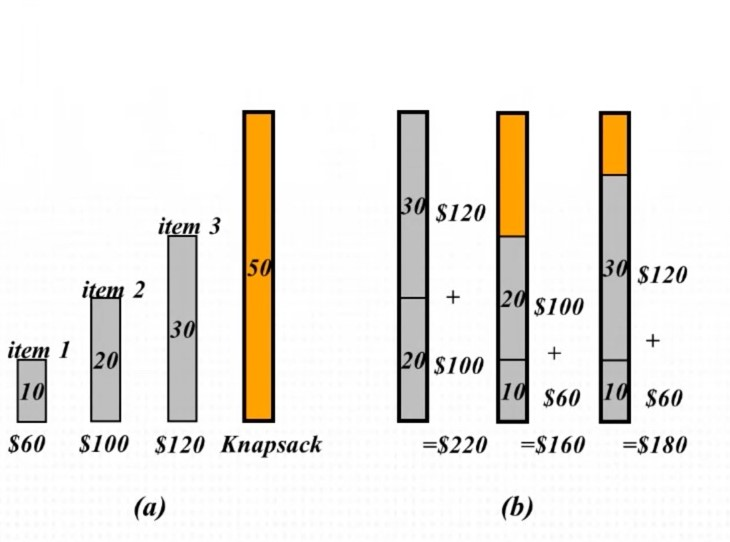

### 배낭 채우기 문제
- 도둑이 상점에서 n개의 물건을 훔친다고 하자. 도둑의 가방에 담을 수 있는 무게의 한계(50kg)가 있을 때, 가장 많은 이득($)을 취할 수 있는 경우는? 

- 10kg 60dollars | 20kg 100dollars | 30kg 120dollars
- 그리디 방식 적용: 도둑은 현재에 가장 좋은 것, 즉 가장 비싼 것을 먼저 가방에 넣는다.
- 
- 30kg + 20kg = 220 dollars (V)
- 20kg + 10kg = 160 dollars
- 30kg + 10kg = 180 dollars
- 가장 최적의 솔루션 -> 각각의 물건을 kg당 쪼갤 수 있다고 생각하고, 60(10kg) + (50 + 50)(20kg) + (40 + 40)(30kg * 2/3) = 240 dollars
- 결국 그리디 알고리즘을 사용하여, 최적의 결과에 근접하는 결과를 만들어 낼 수 있다.

## 그리디 알고리즘의 정당성을 고민하면서 문제의 해결방법 떠올리는 것이 중요하다!

# 실전문제1
## 큰 수의 법칙
- 배열의 크기 N, 숫자가 더해지는 횟수 M, 특정 인덱스의 수가 연속해서 더해질 수 있는 횟수 K
- 주어진 수들을 M번 더하여 가장 큰 수를 만드는 법칙. 단, 특정 인덱스에 해당하는 수가 연속해서 K번을 초과하여 더해질 수 없다.
- EX) N=5, M=8, K=3, 배열 2 4 5 4 6
- 6+6+6+5+6+6+6+5 = 46

- 배열에서 가장 큰 수와 두 번째로 작은 수가 서로 다를 때, 배열에서 가장 큰 수를 K번(최대로 반복할 수 있는 횟수)더하고, 그 다음 작은 수를 최소한으로 더한다면, 가장 큰 수를 만들 수 있다. 

In [1]:
#내가 짠 코드
n, m, k = map(int, input().split())
num = sorted(list(map(int, input().split())), reverse=True)
result = 0

first_num = num[0]
sec_num = num[1]
#print(first_num)
#print(sec_num)
    
if first_num != sec_num:
    result += first_num * (m // k) * k
    result += sec_num * (m % k)
else:
    result = first_num * m
    print(result)
print(result)

5 8 3
2 4 5 4 6
46


- 그리디 정당성: 가장 큰 수를 만들기 위해서는 첫 번째로 가장 큰 수를 최대한(K번) 가장 많이 더하고, 두 번째로 작은 수를 가장 적게 더한다. 
- 내가 생각하기에 전체 경우의 수를 두개로 나누어서, 가장 큰 수와 가장 작은 수가 같을 때와 다를 때를 나누었다. 
- 후자의 경우 첫 번째 큰 수를 m번 곱하는 방식으로 하면 효율성을 높일 수 있을 것이라 생각함.
- 전자의 경우에는 첫 번째 큰 수를 몇 번 더해야 하는지를 간단하게 나타내기 위해,
- 예시.. m(8)에서 나타날 수 있는 경우는 k(3)번인데, 그러면 가장 큰 수가 연속으로 몇 번 등장할 수 있는지를 생각해보면, m//k(8//3)번, 즉 2번이다. 여기에 k(3)번을 곱해주면, 가장 큰 수가 몇 번 등장해야 하는지 알 수 있다. 두 번째로 작은 수는 m에서 k를 나눈 나머지이므로 (m % k)를 곱하여 결과값에 더해준다.

In [2]:
#책의 예시
n, m, k = map(int, input().split())
data = list(map(int, input().split()))

data.sort()
first = data[n-1]
second = data[n-2]

#가장 큰 수가 더해지는 횟수 계산
count = int(m / (k+1)) * k
count += m % (k+1)

result = 0
result += (count) * first #가장 큰 수 더하기
result += (m-count) * second  #두 번째로 큰 수 더하기

print(result)

5 8 3
2 4 5 4 6
46


- 책에서는 반복되는 수열에 대해 파악하는 방식으로 진행하였다.
- 해당 예시에서, 6+6+6+5가 반복되는 것에 주목
- 반복되는 수열의 길이는 k+1 (4)이므로 m을 k+1로 나눈 몫이 수열이 반복되는 횟수가 된다. (8//4). 여기에 k를 곱해주면 가장 큰 수가 등장하는 횟수가 된다.

# 실전문제2
## 숫자 카드 게임
- N(행) * M(열) 배열의 숫자 카드들이 있다.
- 행에서 숫자가 가장 낮은 카드를 선택한다.
- 최종적으로 가장 높은 숫자의 카드를 골라야한다.

- 행을 돌아가면서 가장 낮은 숫자를 찾고, 그것들 중에서 가장 큰 수를 찾아야 한다.

In [ ]:
#내가 짠 코드
n, m = map(int, input().split())

mins = []
for _ in range(n):
    nums = map(int, input().split())
    mins.append(min(nums))
print(max(mins))

In [ ]:
#min()함수를 이용하는 답안 예시
n, m = map(int, input().split())

result = 0
for i in range(n):
    data = list(map(int, input().split()))
    min_value = min(data)
    result = max(result, min_value)

In [ ]:
#2중 반복문 구조를 이용하는 답안 예시

n, m = map(int, input().split())

result = 0
for i in range(n):
    data = list(map(int, input().split()))
    #현재 줄에서 가장 작은 수 찾기
    min_value = 10001 #왜 min_value 초기값을 잡았지?
    for a in data:
        min_value = min(min_value, a)
    #가장 작은 수들 중에서 가장 큰 수 찾기
    result = max(result, min_value)
print(result)

- 입력 조건에서 입력으로 들어오는 수는 모두 10,000이하이므로 단순히 배열에서 가장 작은 수를 찾는 기본 문법을 이용하여 각 행에서 가장 작은 수를 찾은 다음, 그 수 중에서 가장 큰 수를 찾는 방식으로 문제를 해결할 수 있다.

# 실전문제3
## 1이 될 때까지
- 어떤수 N이 1이 될 때까지 두 과정 중 하나를 반복적으로 선택하여 수행한다.
- 1. N에서 1을 뺀다 / 2. N을 K로 나눈다.(N%K == 0일 때만)
- EX) N=17, K=4, 1번 -> 16, 이후 2번의 과정을 거쳐 4로 나누어주게 되면 N=1이 된다.
- 따라서 총 실행 횟수는 3. 이는 N을 1로 만드는 최소 횟수이다.

In [ ]:
n, k = map(int, input().split())

cnt = 0
while n!= 1:
    if n % k == 0:
        n /= k
        cnt += 1
    else:
        n -= 1
        cnt +=1
        
print(cnt)

- N이 1이 아닐 때 계속 while문을 돌린다. 
- N이 0이 아니라면, K로 나누어 N에 저장하고, 그렇지 않다면 1을 뺀다.
- 이 방법은 N이 매우 큰 수 일때 빠르게 동작하지 않는다.(시간 초과가 될 수 있다)

In [ ]:
#답안 예시
n, k = map(int, input().split())
result = 0

while True:
    #n==k로 나누어 떨어지는 수가 될 때까지 1씩 빼기
    target = (n//k) * k #k로 나누어 떨어지는 n을 조사한다.
    result += (n - target) #n이 target이 되려면 1을 몇 번 빼야 하는지 조사한다.
    n = target #n을 target으로 변경한다.
    
    #n이 k보다 작을 때(더 이상 나눌 수 없을 때) 반복문을 탈출한다.
    if n < k:
        break
        
    result += 1 #나누는 기능에 대한 횟수를 1추가
    n //= k

#마지막으로 남은 수에 대하여 1씩 빼기
result += (n-1)
print(result)

ex) n = 25, k = 4

- 시각화
http://pythontutor.com/visualize.html#mode=display

# 기출문제1
## 모험가 길드
- n명의 모험가에 대해 공포도를 측정
- x의 공포도를 지닌 모험가는 반드시 x명 이상으로 구성된 모험가 그룹에 참여해야 여행을 떠날 수 있다.
- 최대 몇 개의 모험가 그룹을 만들 수 있는가
- ex) n = 5 / 공포도 2 3 1 2 2
- 2개의 그룹 (1, 2, 3 / 2, 2)
- 모든 모험가를 특정한 그룹에 넣을 필요는 없다.

 - 나 -> 공포도가 최고인 사람이 그룹 내에 사람을 가장 많이 필요로 하므로, 공포도가 최대인 사람을 먼저 골라야 한다고 생각했음.
 - 근데 그렇게 되면 그룹 수를 최댓값으로 만들지 못함.
 - 그래서 정답에서는 작은 공포도의 사람부터 그룹에 넣어야 한다고 설명되어 있다.

In [ ]:
n = int(input())
data = list(map(int, input().split()))
data.sort()

result = 0 # 총 그룹 수
count = 0 #현재 그룹에 포함된 모험가의 수

for i in data: #공포도 낮은 것부터 확인
    count += 1 #현재 그룹에 지금 해당하는 모험가를 포함시키기
    if count >= i: #현재 그룹에 포함된 모험가의 수가 현재 공포도 이상이면, 그룹o
        result += 1 #총 그룹 수 1 증가
        count = 0
print(result)


# 기출문제2
## 곱하기 혹은 더하기
- 0에서 부터 0로만 이루어진 문자열 s
- 왼쪽부터 오른쪽으로 모든 숫자를 확인하여 숫자 사이에 x 혹은 + 연산자를 넣어 결과적으로 만들어질 수 있는 갖아 큰 수를 구하는 프로그램을 작성.
- x 와 + 의 연산 순서를 지키지 않는다.
- ex) 02984 -> (0+2)* 9 * 8 * 4 = 576

- 더하기 연산보다 곱하기 연산에서 더 큰 수를 만든다.

- 나-> 0이 포함되어 있는 경우에는 곱하기를 하면 0이 되므로, 이 경우 더하기 연산을 수행해야 한다. (하지만 1일 때도 곱하면 자기 자신이 되므로, 차라리 1을 더하기 연산을 해주는 것이 더 큰 결과를 만들어낼 수 있다)
- 따라서 연산을 할 때, 두 수 중에서 하나라도 1이하인 경우에는 더하고, 2 이상이면 곱해야 한다.

In [ ]:
data = input()
result = int(data[0])
for i in range(1, len(data)):
    # 두 수 중에서 하나라도 0 혹은 1인 경우, 곱하지 말고 더하기 연산을 수행한다.
    num = int(data[i])
    if num<1 or result <=1:
        result += num
    else:
        result *= num
print(result)

# 기출문제3
## 문자열 뒤집기(백준: https://www.acmicpc.net/problem/1439)

- 0과 1로만 이루어진 문자열 s
- 이 문자열 s에 있는 모든 숫자를 전부 같게 만들려 한다.
- s에서 연속된 하나 이상의 숫자를 잡고 모두 뒤집는다.
- EX) s = '0001100'
- 1. 전체를 뒤집으면 '1110011'
- 2. 4번째부터 5번째 문자까지 뒤집으면 '1111111'이 되어서 두 번만에 모두 같은 숫자로 만들 수 있다.
- 하지만, 처음부터 11을 00으로 뒤집는다면, 한번만에 모두 0으로 만들 수 있다.
- 문자열 s가 주어졌을 때, 행동의 최소 횟수를 출력하라.

- 참고: https://bgspro.tistory.com/42
- 다른 예시 '1100011001' -> 연속된 0의 개수가 2개, 연속된 1의 개수가 3개 이므로, 000, 00을 뒤집어 총 2번 뒤집으면 된다.
- '101010' -> 연속된 0의 개수가 3개, 연속된 1의 개수가 3개이므로, 3번 뒤집는다

- 1이 연속된 chunck 개수와 0이 연속된 chunck의 개수를 비교하여, chunck가 더 적은 쪽을 뒤집는다.

In [ ]:
#내가 쓴 코드
n = input()
cnt_box = []

count_1 = n.split("0")
count_1 = [v for v in count_1 if v] #count_1의 공백문자들 삭제
count_0 = n.split("1")
count_0 = [v for v in count_0 if v] #count_0의 공백문자들 삭제
#print(count_1)
#print(count_0)

cnt_box.append(len(count_1))
cnt_box.append(len(count_0))
#print(cnt_box)
print(min(cnt_box))

#or
#print(min(len(count_1), len(count_0)))

- 1이 연속된 청크를 구하기 위해서는 0으로 split을 해주고, 0이 연속된 청크를 구하기 위해서는 1로 split을 해준다.
- 그 중 청크가 작은 개수를 뒤집으면 행동의 최소 횟수를 알 수 있다.

In [ ]:
#답안 예시: 전체 리스트의 원소를 앞에서부터 하나씩 확인
data = input()
count0 = 0 #전부 0으로 만드는 경우
count1 = 0 #전부 1로 만드는 경우

#첫 번째 원소에 대해서 처리
if data[0] == "1": #첫번째 원소가 0이면 일단 전부1로 만드는 경우가 +1
    count0 += 1
else:
    count1 += 1
    
#두 번째 원소부터 모든 원소를 확인하며
for i in range(len(data) - 1): #두 번째 원소부터인데 왜 1부터 시작안하지
    if data[i] != data[i+1]: #0인덱스와 1인덱스를 비교
        #다음 수에서 1로 바뀌는 경우
        if data[i+1] == "1": #0에서 1로 바뀌면 전부0으로 만드는 경우를 +1
            count0 += 1
        #다음 수에서 0으로 바뀌는 경우
        else: 
            count1 += 1 #1에서 0으로 바뀌면 전부0으로 만드는 경우를 +1
print(min(count0, count1))